COMP 551 Mini-Project 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import keras

# Acquire the data

In [ ]:
from keras.datasets import mnist
(raw_X_train, raw_y_train), (raw_X_test, raw_y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("The shape of the training iamges are:", raw_X_train.shape)
print("The shape of the training labels are:", raw_y_train.shape)

The shape of the training iamges are: (60000, 28, 28)
The shape of the training labels are: (60000,)


In [ ]:
print("The shape of the test images are:", raw_X_test.shape)
print("The shape of the test labels are:", raw_y_test.shape)

The shape of the test images are: (10000, 28, 28)
The shape of the test labels are: (10000,)


Visualize Training Data:

5

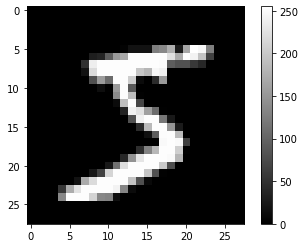

In [ ]:
plt.imshow(raw_X_train[0], cmap='gray')
plt.colorbar()
raw_y_train[0]

In [ ]:
num = 20
images = raw_X_train[:num]
labels = raw_y_train[:num]

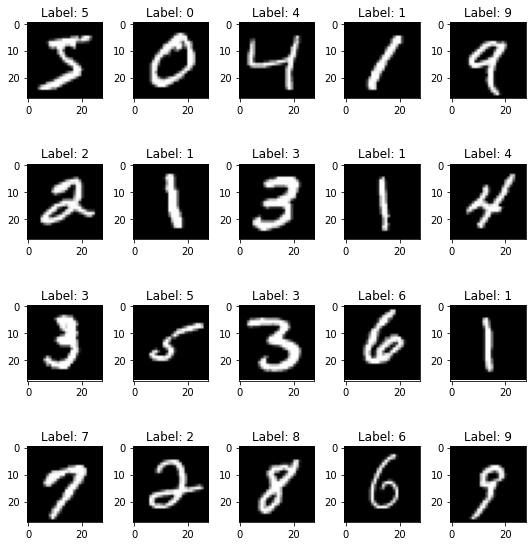

In [ ]:
num_row = 4
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
train_label_count = {}
for i in range(len(np.unique(raw_y_train))):
  train_label_count[i] = raw_y_train.tolist().count(i)
print(train_label_count)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
test_label_count = {}
for i in range(len(np.unique(raw_y_test))):
  test_label_count[i] = raw_y_test.tolist().count(i)
print(test_label_count)

{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
label_count = {}
for i in range(len(np.unique(raw_y_train))):
  label_count[i] = train_label_count[i] + test_label_count[i]
print(label_count)

{0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


In [ ]:
x_h = list(range(10))
x_h = [str(x) for x in x_h]
y_h = []
for i in range(len(np.unique(raw_y_train))):
  y_h.append(label_count[i])
y_h

[6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]

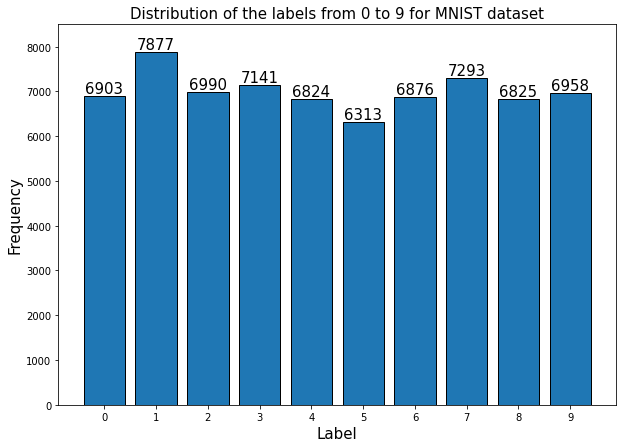

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x_h, y_h, ec='black')
for i in range(len(np.unique(raw_y_train))):
  plt.text(i, y_h[i], label_count[i], ha='center', va='bottom', fontsize=15)
plt.xlabel('Label', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Distribution of the labels from 0 to 9 for MNIST dataset', fontsize=15)
plt.ylim([0,8500])
plt.show()

Reshape train and test data:

In [ ]:
X_train = raw_X_train.reshape(raw_X_train.shape[0], raw_X_train.shape[1] * raw_X_train.shape[2])
X_test = raw_X_test.reshape(raw_X_test.shape[0], raw_X_test.shape[1] * raw_X_test.shape[2])

One-Hot encoding:

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(raw_y_train, num_classes=10)
y_test = to_categorical(raw_y_test, num_classes=10)

In [ ]:
print("The shape of X_train:",X_train.shape)
print("The shape of y_train:", y_train.shape)
print("The shape of X_test:", X_test.shape)
print("The shape of y_test:", y_test.shape)

The shape of X_train: (60000, 784)
The shape of y_train: (60000, 10)
The shape of X_test: (10000, 784)
The shape of y_test: (10000, 10)


normalizing tarin and test data:

In [ ]:
norm_X_train = X_train / 255
norm_X_test = X_test / 255

# Random Forest Model

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(norm_X_train, raw_y_train)
rf.score(norm_X_test, raw_y_test)

0.9705

In [ ]:
print("The true label of test data is", raw_y_test)
print("The predicted label of test data is", rf.predict(X_test))

The true label of test data is [7 2 1 ... 4 5 6]
The predicted label of test data is [7 2 1 ... 4 5 6]


Text(0.5, 1.0, 'MNIST confusion matrix using random forest')

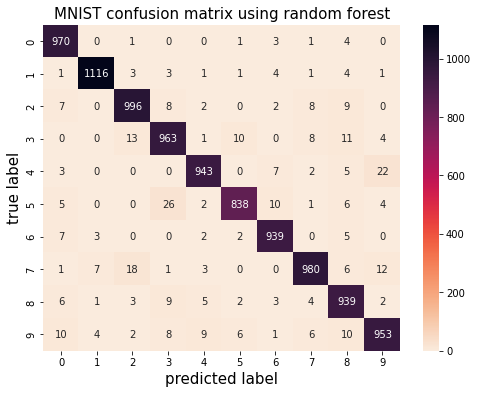

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(raw_y_test, rf.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap=sns.cm.rocket_r, fmt='g')
plt.xlabel('predicted label', fontsize=15)
plt.ylabel('true label', fontsize=15)
plt.title('MNIST confusion matrix using random forest', fontsize=15)


In [ ]:
print(metrics.confusion_matrix(raw_y_test, rf.predict(X_test)))

[[ 969    0    0    0    0    2    5    1    3    0]
 [   0 1124    2    3    0    2    2    1    1    0]
 [   5    0  999    7    2    0    3    9    7    0]
 [   1    0   10  971    0   10    0    8    8    2]
 [   1    0    1    0  958    0    6    0    2   14]
 [   3    0    0   11    0  862    8    2    4    2]
 [   6    3    0    0    3    4  939    0    3    0]
 [   1    3   20    1    0    0    0  989    3   11]
 [   5    0    5    6    4    9    4    4  928    9]
 [   8    5    1    9    8    3    1    4    4  966]]


In [ ]:
print(metrics.accuracy_score(raw_y_test, rf.predict(X_test)))

0.9705


In [ ]:
print(metrics.classification_report(raw_y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
acc = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i,random_state=0)
  rf.fit(X_train, raw_y_train)
  acc.append(rf.score(X_test, raw_y_test))
print(acc)

[0.817, 0.8235, 0.8832, 0.9061, 0.922, 0.9306, 0.9352, 0.943, 0.9435, 0.9468, 0.9497, 0.9514, 0.9539, 0.9541, 0.955, 0.9566, 0.9564, 0.9583, 0.958, 0.9583, 0.9606, 0.9605, 0.9626, 0.9624, 0.963, 0.963, 0.9629, 0.9641, 0.9635, 0.9642, 0.9639, 0.9642, 0.9639, 0.9644, 0.9642, 0.9648, 0.9652, 0.9655, 0.9656, 0.9652, 0.9656, 0.9664, 0.9663, 0.966, 0.966, 0.9668, 0.9668, 0.966, 0.9665, 0.9667, 0.9668, 0.9669, 0.967, 0.9676, 0.9666, 0.9676, 0.9678, 0.9685, 0.9689, 0.968, 0.9686, 0.9679, 0.968, 0.968, 0.9681, 0.968, 0.9681, 0.9685, 0.9685, 0.9686, 0.9692, 0.9692, 0.9696, 0.9692, 0.9694, 0.9694, 0.9693, 0.9693, 0.9696, 0.9698, 0.9701, 0.9698, 0.9702, 0.9696, 0.9695, 0.9692, 0.9694, 0.9694, 0.97, 0.9696, 0.9696, 0.9697, 0.9701, 0.9703, 0.9702, 0.9702, 0.97, 0.9702, 0.9703, 0.9705]


Text(0.5, 1.0, 'Accuracy v.s. no. of trees in forest')

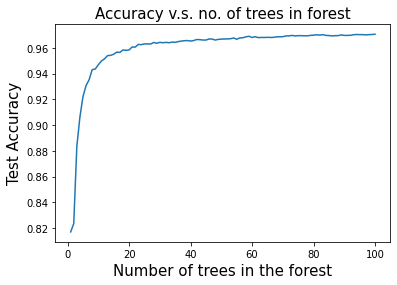

In [ ]:
plt.plot(list(range(1,101)), acc)
plt.xlabel("Number of trees in the forest", fontsize=15)
plt.ylabel("Test Accuracy", fontsize=15)
plt.title("Accuracy v.s. no. of trees in forest", fontsize=15)

In [ ]:
feature_imp = {}
for i in range(X_train.shape[1]):
  feature_imp['pixel_'+str(i)] = rf.feature_importances_[i]

print(feature_imp)

{'pixel_0': 0.0, 'pixel_1': 0.0, 'pixel_2': 0.0, 'pixel_3': 0.0, 'pixel_4': 0.0, 'pixel_5': 0.0, 'pixel_6': 0.0, 'pixel_7': 0.0, 'pixel_8': 0.0, 'pixel_9': 0.0, 'pixel_10': 0.0, 'pixel_11': 0.0, 'pixel_12': 0.0, 'pixel_13': 0.0, 'pixel_14': 0.0, 'pixel_15': 0.0, 'pixel_16': 0.0, 'pixel_17': 0.0, 'pixel_18': 0.0, 'pixel_19': 0.0, 'pixel_20': 0.0, 'pixel_21': 0.0, 'pixel_22': 0.0, 'pixel_23': 0.0, 'pixel_24': 0.0, 'pixel_25': 0.0, 'pixel_26': 0.0, 'pixel_27': 0.0, 'pixel_28': 0.0, 'pixel_29': 0.0, 'pixel_30': 0.0, 'pixel_31': 0.0, 'pixel_32': 0.0, 'pixel_33': 0.0, 'pixel_34': 6.862110844988922e-07, 'pixel_35': 0.0, 'pixel_36': 1.7474782657308666e-06, 'pixel_37': 1.0030907632325675e-06, 'pixel_38': 2.302330328267003e-06, 'pixel_39': 1.984090199768639e-06, 'pixel_40': 1.384801805272413e-06, 'pixel_41': 3.507850319764632e-06, 'pixel_42': 4.773773550277959e-06, 'pixel_43': 6.0407936621633765e-06, 'pixel_44': 1.6495306107755634e-06, 'pixel_45': 3.7922544534643858e-06, 'pixel_46': 1.2913389981

In [ ]:
feature_imp = sorted(feature_imp.items(), key=lambda x:x[1], reverse=True)

In [ ]:
sort_feature_imp={}
for l in feature_imp:
  sort_feature_imp[l[0]] = l[1]

print(sort_feature_imp)

{'pixel_378': 0.010437113662093416, 'pixel_433': 0.010059999504401234, 'pixel_350': 0.008391255109723644, 'pixel_405': 0.008114961476686553, 'pixel_569': 0.008096867069272894, 'pixel_409': 0.00796217674144147, 'pixel_461': 0.007483223833112436, 'pixel_406': 0.007477148690748894, 'pixel_318': 0.00744829598088821, 'pixel_542': 0.007024624455806562, 'pixel_429': 0.006809744119143895, 'pixel_489': 0.0065288929641846224, 'pixel_210': 0.006454393650641983, 'pixel_377': 0.006329444343023769, 'pixel_291': 0.0062733592378042225, 'pixel_155': 0.006257859270298404, 'pixel_375': 0.006201144796049563, 'pixel_347': 0.006130207177579708, 'pixel_437': 0.006101888441893037, 'pixel_515': 0.006095781472381492, 'pixel_154': 0.006029436470382257, 'pixel_211': 0.0060269388658946085, 'pixel_543': 0.005998110236589893, 'pixel_488': 0.005914854255437758, 'pixel_346': 0.0056957589482654865, 'pixel_381': 0.005601685633630667, 'pixel_401': 0.005580702048484224, 'pixel_514': 0.005541017585045751, 'pixel_407': 0.00

In [ ]:
zero_feature_imp=[]
for e in list(sort_feature_imp):
  if (sort_feature_imp[e]==0):
    sort_feature_imp.pop(e)
    zero_feature_imp.append(e)

print(zero_feature_imp)
print(len(zero_feature_imp))

['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5', 'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10', 'pixel_11', 'pixel_12', 'pixel_13', 'pixel_14', 'pixel_15', 'pixel_16', 'pixel_17', 'pixel_18', 'pixel_19', 'pixel_20', 'pixel_21', 'pixel_22', 'pixel_23', 'pixel_24', 'pixel_25', 'pixel_26', 'pixel_27', 'pixel_28', 'pixel_29', 'pixel_30', 'pixel_31', 'pixel_32', 'pixel_33', 'pixel_35', 'pixel_49', 'pixel_51', 'pixel_52', 'pixel_53', 'pixel_54', 'pixel_55', 'pixel_56', 'pixel_57', 'pixel_58', 'pixel_59', 'pixel_60', 'pixel_61', 'pixel_82', 'pixel_83', 'pixel_84', 'pixel_85', 'pixel_111', 'pixel_112', 'pixel_113', 'pixel_115', 'pixel_140', 'pixel_141', 'pixel_168', 'pixel_169', 'pixel_196', 'pixel_197', 'pixel_224', 'pixel_252', 'pixel_253', 'pixel_280', 'pixel_281', 'pixel_308', 'pixel_336', 'pixel_363', 'pixel_364', 'pixel_365', 'pixel_392', 'pixel_393', 'pixel_420', 'pixel_421', 'pixel_448', 'pixel_449', 'pixel_476', 'pixel_505', 'pixel_532', 'pixel_533', 'pixel_

In [ ]:
imp_features = []
imp_values = []
for e in list(sort_feature_imp):
  imp_features.append(e)
  imp_values.append(sort_feature_imp[e])


Text(0.5, 1.0, 'Visualizing the first 20 important features in MINST database')

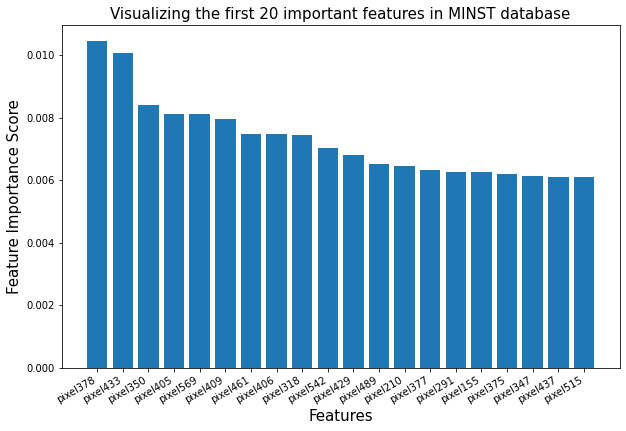

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(imp_features[:20], imp_values[:20])
plt.gcf().autofmt_xdate()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature Importance Score", fontsize=15)
plt.title("Visualizing the first 20 important features in MINST database", fontsize=15)


In [ ]:
mse=[]
for i in range(1,51):
  rf = RandomForestClassifier(n_estimators=10,random_state=0, max_depth=i)
  rf.fit(X_train, raw_y_train)
  mse.append(metrics.mean_squared_error(raw_y_test, rf.predict(X_test)))
print(mse)

[9.3998, 8.334, 5.1733, 3.9443, 3.0125, 2.3772, 1.9451, 1.7214, 1.4481, 1.2899, 1.0814, 0.9951, 0.9799, 1.0036, 0.9374, 0.9077, 0.9769, 0.8902, 0.9246, 0.8967, 0.9518, 1.0009, 1.0335, 0.9011, 0.9458, 0.8844, 0.9031, 0.9301, 0.9889, 0.9185, 0.9138, 0.8927, 0.9194, 0.9799, 0.9267, 1.0102, 0.9694, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073, 1.0073]


(0.0, 10.0)

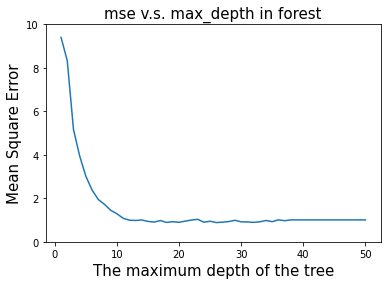

In [ ]:
plt.plot(list(range(1,51)), mse)
plt.xlabel("The maximum depth of the tree", fontsize=15)
plt.ylabel("Mean Square Error", fontsize=15)
plt.title("mse v.s. max_depth in forest", fontsize=15)
plt.ylim([0,10])

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, raw_y_train)
rf.score(X_test, raw_y_test)

0.9705

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

In [ ]:
del_pixel = []
for e in zero_feature_imp:
  del_pixel.append(int(e.split("_")[1]))
print(del_pixel)
print(len(del_pixel))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 82, 83, 84, 85, 111, 112, 113, 115, 140, 141, 168, 169, 196, 197, 224, 252, 253, 280, 281, 308, 336, 363, 364, 365, 392, 393, 420, 421, 448, 449, 476, 505, 532, 533, 559, 560, 587, 588, 589, 615, 616, 617, 643, 644, 645, 671, 672, 673, 699, 700, 701, 725, 727, 728, 729, 730, 731, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 780, 781, 782, 783]
118


In [ ]:
update_X_train = X_train_df.drop(del_pixel, axis=1).to_numpy()
update_X_test = X_test_df.drop(del_pixel, axis=1).to_numpy()
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(update_X_train, raw_y_train)
rf.score(update_X_test, raw_y_test)

0.971

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(update_X_train, raw_y_train)
rf.score(update_X_test, raw_y_test)

0.9718

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train, raw_y_train)
rf.score(X_test, raw_y_test)

0.972

In [ ]:
keep_3quater_pixel = []
for e in list(sort_feature_imp.keys())[0:588]:
  keep_3quater_pixel.append(int(e.split("_")[1]))
print(keep_3quater_pixel)
print(len(keep_3quater_pixel))

[378, 433, 350, 405, 569, 409, 461, 406, 318, 542, 429, 489, 210, 377, 291, 155, 375, 347, 437, 515, 154, 211, 543, 488, 346, 381, 401, 514, 407, 319, 379, 354, 212, 431, 460, 238, 430, 517, 323, 434, 351, 462, 486, 376, 568, 656, 541, 152, 239, 487, 374, 348, 403, 322, 513, 428, 435, 349, 266, 270, 382, 183, 271, 458, 402, 596, 317, 457, 459, 267, 432, 290, 657, 182, 380, 237, 298, 156, 485, 358, 269, 655, 353, 570, 658, 209, 352, 326, 297, 544, 240, 571, 540, 235, 268, 265, 324, 456, 490, 320, 516, 345, 289, 567, 463, 625, 262, 410, 295, 263, 436, 597, 626, 327, 408, 455, 404, 296, 181, 153, 427, 241, 242, 294, 185, 400, 521, 243, 299, 438, 264, 213, 512, 551, 653, 292, 157, 539, 624, 321, 184, 654, 325, 386, 372, 373, 464, 572, 344, 518, 491, 236, 595, 293, 550, 179, 158, 178, 151, 355, 100, 126, 180, 483, 216, 493, 127, 465, 214, 484, 316, 578, 300, 261, 177, 207, 573, 545, 215, 454, 272, 577, 574, 328, 208, 468, 627, 466, 206, 659, 495, 244, 580, 205, 329, 494, 660, 523, 549, 234,

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_df[keep_3quater_pixel], raw_y_train)
rf.score(X_test_df[keep_3quater_pixel], raw_y_test)

0.9692

In [ ]:
keep_half_pixel = []
for e in list(sort_feature_imp.keys())[0:392]:
  keep_half_pixel.append(int(e.split("_")[1]))
print(keep_half_pixel)
print(len(keep_half_pixel))

[378, 433, 350, 405, 569, 409, 461, 406, 318, 542, 429, 489, 210, 377, 291, 155, 375, 347, 437, 515, 154, 211, 543, 488, 346, 381, 401, 514, 407, 319, 379, 354, 212, 431, 460, 238, 430, 517, 323, 434, 351, 462, 486, 376, 568, 656, 541, 152, 239, 487, 374, 348, 403, 322, 513, 428, 435, 349, 266, 270, 382, 183, 271, 458, 402, 596, 317, 457, 459, 267, 432, 290, 657, 182, 380, 237, 298, 156, 485, 358, 269, 655, 353, 570, 658, 209, 352, 326, 297, 544, 240, 571, 540, 235, 268, 265, 324, 456, 490, 320, 516, 345, 289, 567, 463, 625, 262, 410, 295, 263, 436, 597, 626, 327, 408, 455, 404, 296, 181, 153, 427, 241, 242, 294, 185, 400, 521, 243, 299, 438, 264, 213, 512, 551, 653, 292, 157, 539, 624, 321, 184, 654, 325, 386, 372, 373, 464, 572, 344, 518, 491, 236, 595, 293, 550, 179, 158, 178, 151, 355, 100, 126, 180, 483, 216, 493, 127, 465, 214, 484, 316, 578, 300, 261, 177, 207, 573, 545, 215, 454, 272, 577, 574, 328, 208, 468, 627, 466, 206, 659, 495, 244, 580, 205, 329, 494, 660, 523, 549, 234,

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_df[keep_half_pixel], raw_y_train)
rf.score(X_test_df[keep_half_pixel], raw_y_test)

0.9695

In [ ]:
keep_quater_pixel = []
for e in list(sort_feature_imp.keys())[0:196]:
  keep_quater_pixel.append(int(e.split("_")[1]))
print(keep_quater_pixel)
print(len(keep_quater_pixel))

[378, 433, 350, 405, 569, 409, 461, 406, 318, 542, 429, 489, 210, 377, 291, 155, 375, 347, 437, 515, 154, 211, 543, 488, 346, 381, 401, 514, 407, 319, 379, 354, 212, 431, 460, 238, 430, 517, 323, 434, 351, 462, 486, 376, 568, 656, 541, 152, 239, 487, 374, 348, 403, 322, 513, 428, 435, 349, 266, 270, 382, 183, 271, 458, 402, 596, 317, 457, 459, 267, 432, 290, 657, 182, 380, 237, 298, 156, 485, 358, 269, 655, 353, 570, 658, 209, 352, 326, 297, 544, 240, 571, 540, 235, 268, 265, 324, 456, 490, 320, 516, 345, 289, 567, 463, 625, 262, 410, 295, 263, 436, 597, 626, 327, 408, 455, 404, 296, 181, 153, 427, 241, 242, 294, 185, 400, 521, 243, 299, 438, 264, 213, 512, 551, 653, 292, 157, 539, 624, 321, 184, 654, 325, 386, 372, 373, 464, 572, 344, 518, 491, 236, 595, 293, 550, 179, 158, 178, 151, 355, 100, 126, 180, 483, 216, 493, 127, 465, 214, 484, 316, 578, 300, 261, 177, 207, 573, 545, 215, 454, 272, 577, 574, 328, 208, 468, 627, 466, 206, 659, 495, 244, 580, 205, 329, 494]
196


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_df[keep_quater_pixel], raw_y_train)
rf.score(X_test_df[keep_quater_pixel], raw_y_test)

0.9626

In [ ]:
keep_100_pixel = []
for e in list(sort_feature_imp.keys())[0:100]:
  keep_100_pixel.append(int(e.split("_")[1]))
print(keep_100_pixel)
print(len(keep_100_pixel))

[378, 433, 350, 405, 569, 409, 461, 406, 318, 542, 429, 489, 210, 377, 291, 155, 375, 347, 437, 515, 154, 211, 543, 488, 346, 381, 401, 514, 407, 319, 379, 354, 212, 431, 460, 238, 430, 517, 323, 434, 351, 462, 486, 376, 568, 656, 541, 152, 239, 487, 374, 348, 403, 322, 513, 428, 435, 349, 266, 270, 382, 183, 271, 458, 402, 596, 317, 457, 459, 267, 432, 290, 657, 182, 380, 237, 298, 156, 485, 358, 269, 655, 353, 570, 658, 209, 352, 326, 297, 544, 240, 571, 540, 235, 268, 265, 324, 456, 490, 320]
100


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_df[keep_100_pixel], raw_y_train)
rf.score(X_test_df[keep_100_pixel], raw_y_test)

0.9487

In [ ]:
keep_50_pixel = []
for e in list(sort_feature_imp.keys())[0:50]:
  keep_50_pixel.append(int(e.split("_")[1]))
print(keep_50_pixel)
print(len(keep_50_pixel))

[378, 433, 350, 405, 569, 409, 461, 406, 318, 542, 429, 489, 210, 377, 291, 155, 375, 347, 437, 515, 154, 211, 543, 488, 346, 381, 401, 514, 407, 319, 379, 354, 212, 431, 460, 238, 430, 517, 323, 434, 351, 462, 486, 376, 568, 656, 541, 152, 239, 487]
50


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_df[keep_50_pixel], raw_y_train)
rf.score(X_test_df[keep_50_pixel], raw_y_test)

0.9134

In [ ]:
keep_20_pixel = []
for e in list(sort_feature_imp.keys())[0:20]:
  keep_20_pixel.append(int(e.split("_")[1]))
print(keep_20_pixel)
print(len(keep_20_pixel))

[378, 433, 350, 405, 569, 409, 461, 406, 318, 542, 429, 489, 210, 377, 291, 155, 375, 347, 437, 515]
20


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_df[keep_20_pixel], raw_y_train)
rf.score(X_test_df[keep_20_pixel], raw_y_test)

0.8476

In [ ]:
num_pixel = []
test_acc = []
for i in reversed(range(20, 784, 50)):
  num_pixel.append(i)
  keep_pixel = []
  for e in list(sort_feature_imp.keys())[0:i]:
    keep_pixel.append(int(e.split("_")[1]))
  rf = RandomForestClassifier(n_estimators=100, random_state=0)
  rf.fit(X_train_df[keep_pixel], raw_y_train)
  acc = rf.score(X_test_df[keep_pixel], raw_y_test)
  test_acc.append(acc)
print(num_pixel)
print(test_acc)

[770, 720, 670, 620, 570, 520, 470, 420, 370, 320, 270, 220, 170, 120, 70, 20]
[0.9703, 0.9703, 0.9703, 0.9694, 0.9705, 0.9699, 0.9701, 0.9705, 0.9686, 0.9677, 0.9677, 0.9648, 0.9607, 0.9505, 0.9358, 0.8476]


Text(0.5, 1.0, 'Accuracy v.s. num of features')

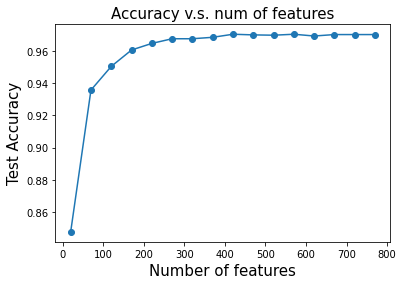

In [ ]:
plt.plot(num_pixel, test_acc, marker='o')
plt.xlabel("Number of features", fontsize=15)
plt.ylabel("Test Accuracy", fontsize=15)
plt.title("Accuracy v.s. num of features", fontsize=15)